In [4]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import statistics as st
from scipy import stats
from scipy.stats import f_oneway
#import category_encoders as ce
import statsmodels.api as sm
import geopandas as gpd
import seaborn as sb

from pandas.plotting import table
from numpy import where
from collections import Counter
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import fisher_exact
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import chi2,mutual_info_classif, SelectFromModel, SelectPercentile, SelectKBest, f_classif, mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, StratifiedShuffleSplit, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PolynomialFeatures
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)
plt.style.use('ggplot')

In [5]:
Xfiles =[
        "SEASON_2016_2017/X_forecast_13_2016_2017.parquet",
        "SEASON_2017_2018/X_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/X_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/X_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/X_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/X_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/X_forecast_13_2022_2023.parquet"
    ]

yfiles = [
        "SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet", 
        "SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet"
    ]

Xtestfiles =[
        "SEASON_2016_2017/X_forecast_13_2016_2017.parquet",
        "SEASON_2017_2018/X_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/X_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/X_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/X_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/X_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/X_forecast_13_2022_2023.parquet"
    ]

ytestfiles = [
        "SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet", 
        "SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet"
    ]

files = [
        "SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet", 
        "SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet"
    ]


In [3]:
def load_data(Xfiles, yfiles):
    
    data = pq.read_table(Xfiles)
    data = data.to_pandas()
    data = data.iloc[:,:62]
    
    target = pq.read_table(yfiles)
    target = target.to_pandas()

    full_data_set = data.join(target)
    full_data_set.drop(columns = ['grid_id_to_latest'], inplace = True)
    full_data_set.dropna(inplace = True)    
    
    target = full_data_set['out_farms']
    data = full_data_set.iloc[:,:61]
    
    return data, target

In [4]:
for file in files:
    y_shp = pq.read_table(file).to_pandas()
    y_shp.replace({False: 0, True: 1}, inplace = True)
    print(file, y_shp.value_counts())

SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet out_farms
0            358734
1                61
dtype: int64
SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet out_farms
0            358795
dtype: int64
SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet out_farms
0            358795
dtype: int64
SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet out_farms
0            359746
1                32
dtype: int64
SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet out_farms
0            358522
1               273
dtype: int64
SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet out_farms
0            358711
1                84
dtype: int64
SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet out_farms
0.0          200484
1.0              48
dtype: int64


In [5]:
X, y = load_data(Xfiles, yfiles)
X.replace({False: 0, True: 1}, inplace = True)
y.replace({False: 0, True: 1}, inplace = True)

# Filtrowanie danych rozsądowko

### Sprawdzenie indeksów kratek siatki z których pochodzą błędne pomiary temperatury

In [6]:
#Sprawdzenie indeksów kratek siatki z których pochodzą błędne pomiary temperatury
grid = X[(X['t2m_mean'] <= 232.15) | (X['t2m_mean'] >= 313)].index.get_level_values(level='grid_id')
grid.value_counts()

1085.0    2240
1120.0    2240
Name: grid_id, dtype: int64

### Zastąpienie nielogicznych wartości temperatur medianą

In [7]:
q2 = X['t2m_mean'].quantile(0.5)
X.loc[X['t2m_mean'] <= 232.15, 't2m_mean'] = q2
X.loc[X['t2m_mean'] >= 313, 't2m_mean'] = q2
q2

282.5361328125

### Sprawdzenie indeksów kratek siatki z których pochodzą błędne pomiary opadow

In [8]:
grid = X[(X['tp_mean'] < 0)].index.get_level_values(level='grid_id')
grid2 = X[(X['tp_min'] < 0)].index.get_level_values(level='grid_id')
grid.value_counts(), grid2.value_counts()

(339.0     5
 50.0      5
 372.0     5
 127.0     5
 128.0     5
          ..
 614.0     1
 613.0     1
 612.0     1
 611.0     1
 1284.0    1
 Name: grid_id, Length: 664, dtype: int64,
 9.0      27
 264.0    27
 79.0     27
 397.0    27
 124.0    26
          ..
 599.0    10
 634.0     9
 633.0     9
 668.0     9
 669.0     9
 Name: grid_id, Length: 983, dtype: int64)

### Zastąpienie nielogicznych wartości opadów medianą

In [9]:
q2 = X['tp_mean'].quantile(0.5)
X.loc[X['tp_mean'] < 0, 'tp_mean'] = q2
q2 = X['tp_min'].quantile(0.5)
X.loc[X['tp_min'] < 0, 'tp_min'] =  q2

### Zastąpienie nielogicznych wartości ciśnienia medianą

In [10]:
q2 = X['sp_mean'].quantile(0.5)
X.loc[X['sp_mean'] < 96520, 'sp_mean'] = q2
q2 = X['sp_mean'].quantile(0.5)
X.loc[X['sp_mean'] > 105440, 'sp_mean'] =  q2

### Zbadanie czy frekwencja wiatru przekracza 24 godziny 

In [11]:
np.sort(X.iloc[:,5].unique())

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24], dtype=int16)

### Zabadanie czy wartosci pokrycia oczka przez dany typ terenu sumuja się do 1

In [12]:
X.iloc[:,15:36].sum(axis=1).unique()

array([1.        , 0.99999994, 1.0000001 , 0.9999999 , 0.9999998 ,
       1.0000002 ], dtype=float32)

In [13]:
grid = X.index.get_level_values(level='grid_id')
len(grid.unique())

983

# Podział danych na dyskretne i ciągłe

In [14]:
discrete_cols = ['exist_63','exist_64','exist_65','exist_66',
                'farms_occur_prev','wild_occur_prev','10m_dir_E','10m_dir_N',
                 '10m_dir_NE','10m_dir_NW','10m_dir_S','10m_dir_SE','10m_dir_SW','10m_dir_W']

X[discrete_cols] = X[discrete_cols].astype('category')

In [15]:
X_dis = X.select_dtypes(include=['category'])

X_con = X.select_dtypes(exclude=['category'])


# Standaryzacja

In [16]:
scaler_stand = StandardScaler()

X_stand = pd.DataFrame(scaler_stand.fit_transform(X), columns = X.columns.to_list())

In [17]:
X_con_stand  = pd.DataFrame(scaler_stand.fit_transform(X_con), columns = X_con.columns.to_list())
X_con_stand.drop(columns = ['ducks_stops', 'greater_stops','north_stops'],inplace=True)

# Badanie normlaności rozkładu

In [18]:
cols = X_con.columns
pvalues = []

for i in range(0,len(X_con.columns)): 
    pvalues.append(stats.kstest(X_con.iloc[:,i], 'norm')[1])

pvalues

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

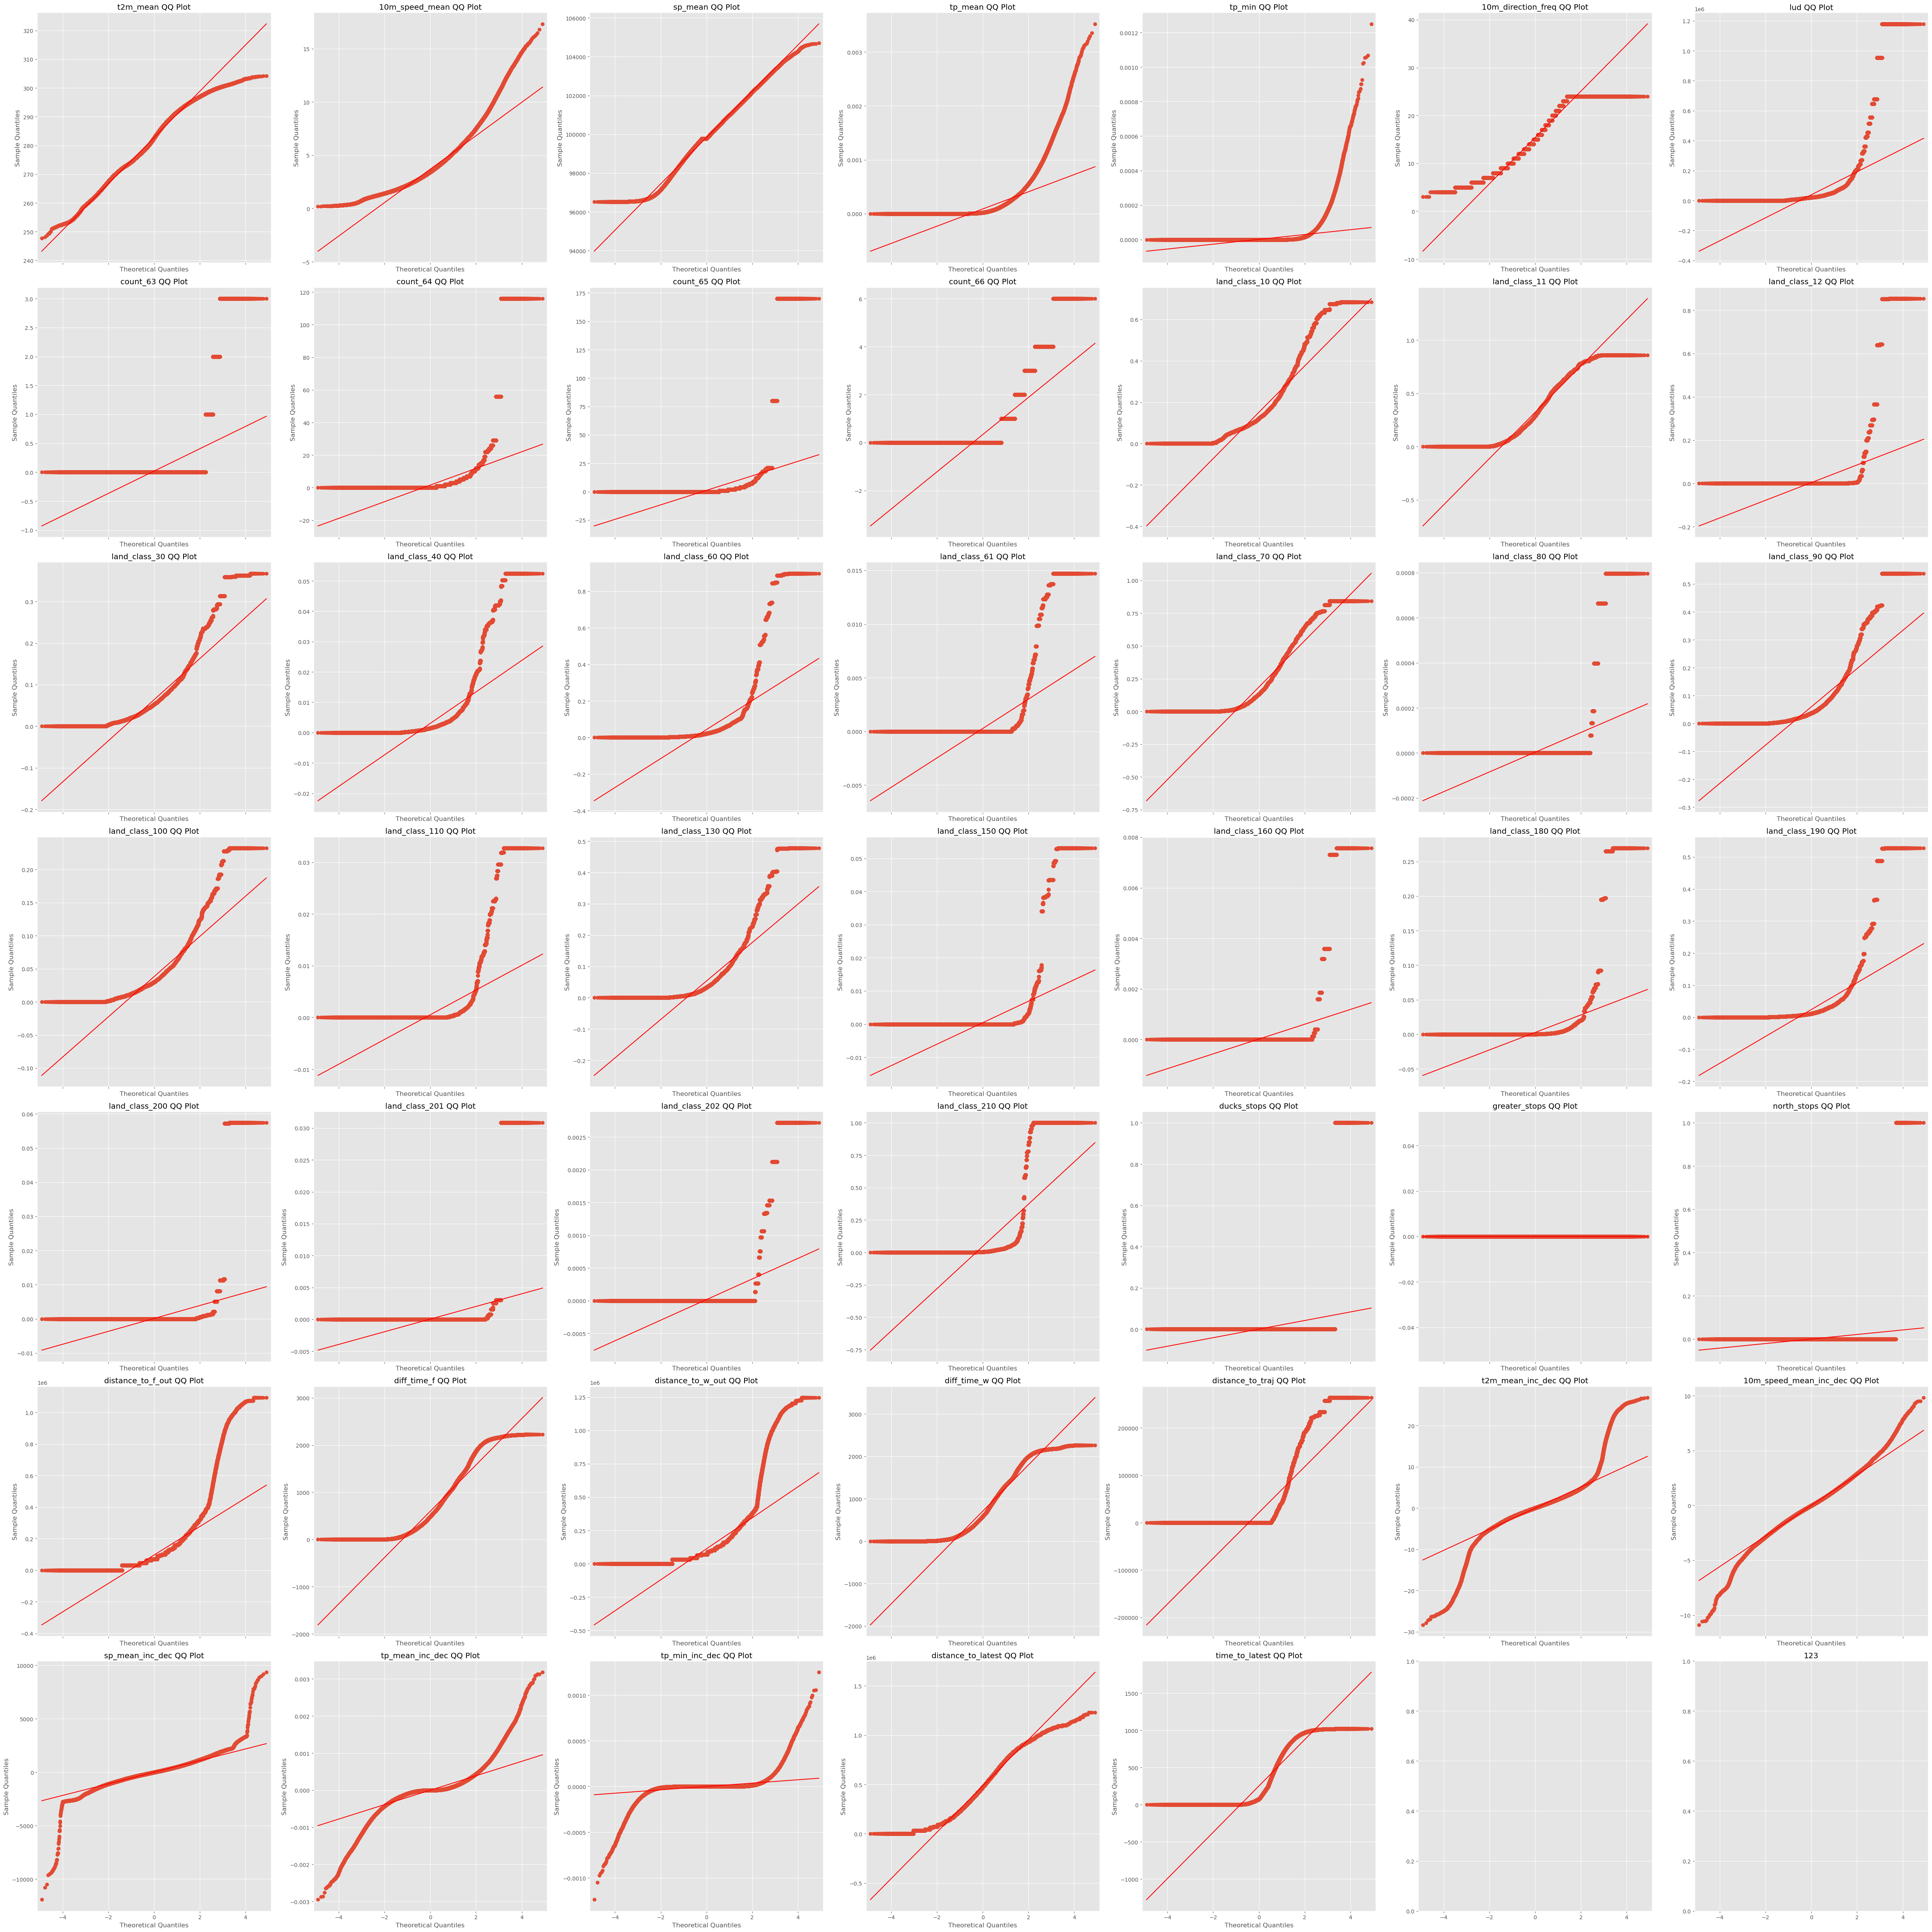

In [19]:
fig, axes = plt.subplots(ncols=7, nrows=7, sharex=True, figsize=(50,50))
for k, ax in zip(X_con.columns, np.ravel(axes)):
    sm.qqplot(X_con[k], line='s', ax=ax)
    ax.set_title(f'{k} QQ Plot')
plt.title('123')
plt.tight_layout()
#plt.savefig('Rozkład zmiennych')

## Otrzymane wyniki wskazują że żadna z badanych zmiennych nie ma rozkłady zbliżonego do rozkładu normlanego

# Korelacja pomiędzy zmiennymi, zastosowano współczynnik korelacji rang Spearmana, dla zwizkow monotonicznych



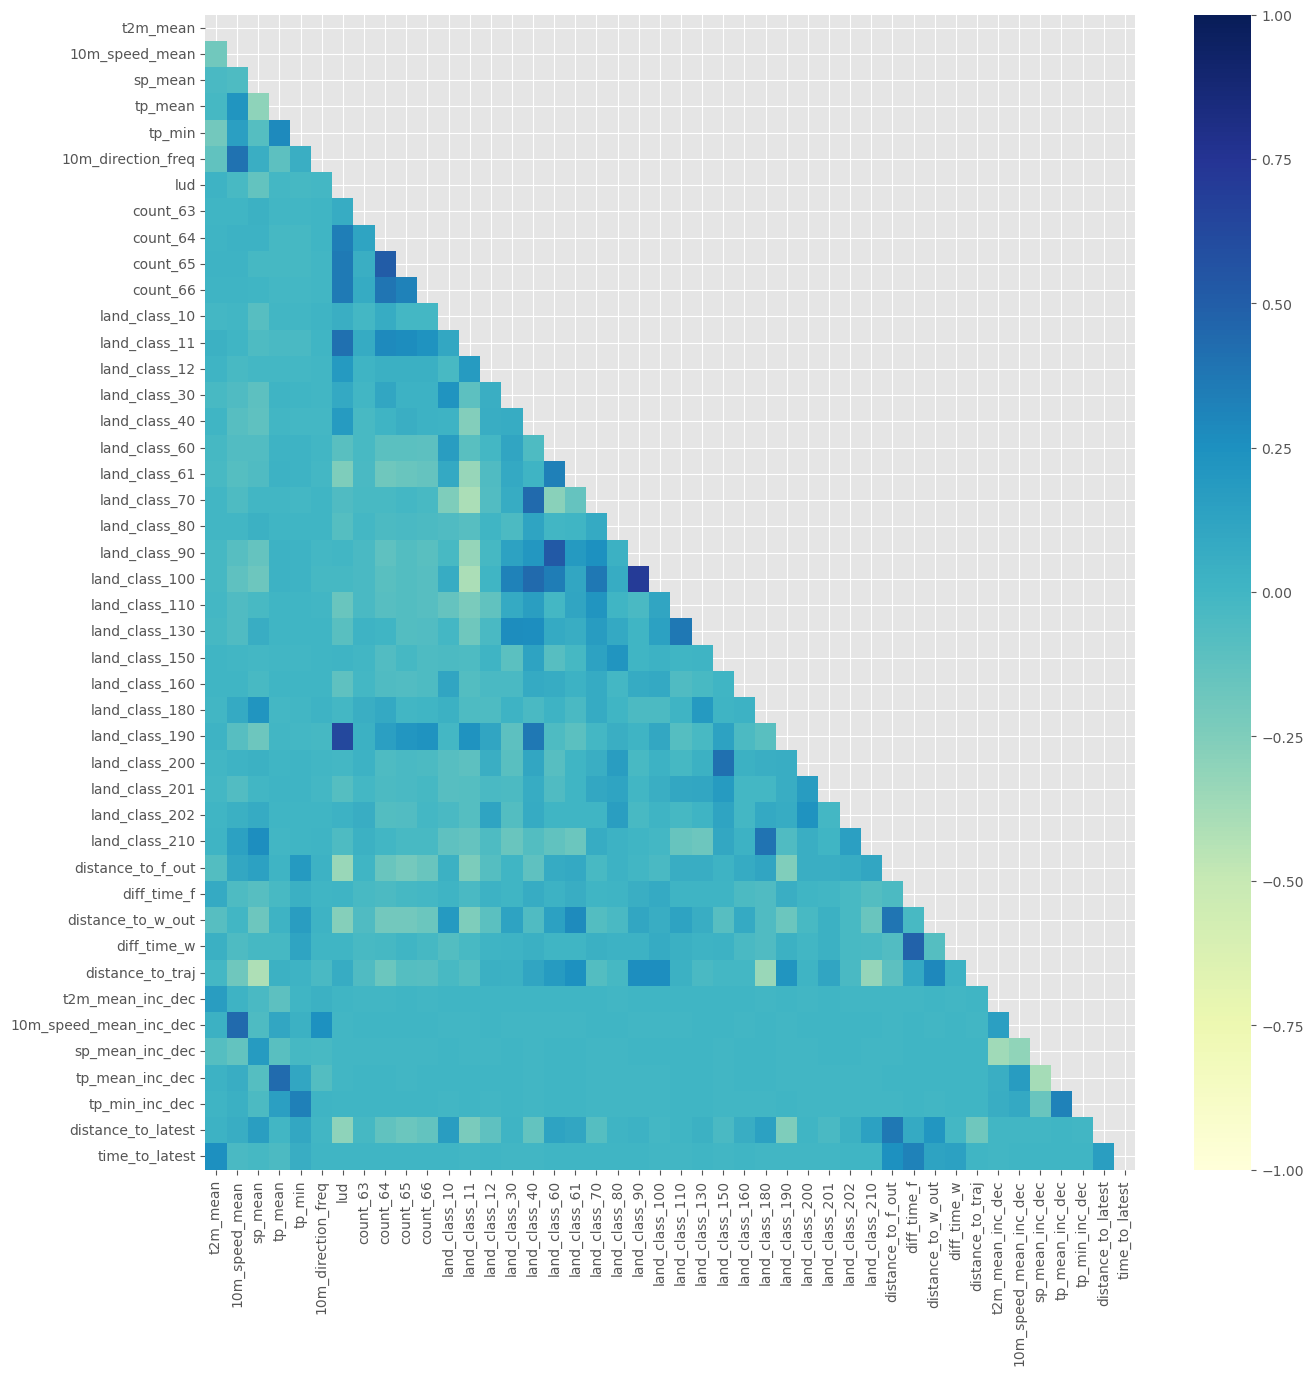

In [20]:
core_matrix = pd.DataFrame(X_con_stand.corr(method='spearman', numeric_only=True))
mask = np.triu(np.ones_like(core_matrix), k = 0)

plt.figure(figsize=(15,15))
heatmap = sb.heatmap(core_matrix, mask = mask, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

In [21]:
result = core_matrix.abs()[(core_matrix.abs() > 0.9)]
for col in result:   
    if result[col].sum() == 1:
        result = result.drop(col)
        result = result.drop(col, axis=1)

        cols = result.columns
col_names = []
result = result.fillna(0)
wspolczynniki_korelacji = []
for i in range(0,result.shape[0]): 
    for j in range(i+1,result.shape[0]):
        if result.iloc[i,j] > 0:
            wspolczynniki_korelacji.append(result.iloc[i,j])
            col_name = cols[i] + '~`' + cols[j]
            col_names.append(col_name)

corr_results = pd.DataFrame.from_dict({'Zmienne' : col_names, 'wspolczynniki_korelacji' : wspolczynniki_korelacji}).set_index('Zmienne')
corr_results.sort_values('wspolczynniki_korelacji', ascending=False, inplace=True)
corr_results.shape

(0, 1)

# Chi-squared Test

### Test wykonany dla danych dyskretnych

In [22]:
chi2_columns = X_dis.columns 
chi2_model = chi2(X_dis,y)
test_score = chi2_model[0]
p_value = chi2_model[1]

chi2_results = pd.DataFrame.from_dict({'Zmienne' : chi2_columns, 'p_value': p_value, 'Wynik testu': test_score}).set_index('Zmienne')
chi2_results.sort_values('p_value',ascending=True,inplace = True)
chi2_results#.round(3)

,p_value,Wynik testu
Zmienne,,
farms_occur_prev,1.146149e-203,927.290732
exist_65,9.290771e-46,201.612057
exist_64,1.442463e-42,186.991242
exist_66,1.755541e-20,86.048749
wild_occur_prev,9.937084e-15,59.908510
10m_dir_W,1.304625e-04,14.635092
10m_dir_E,6.279829e-03,7.468200
10m_dir_NE,1.386684e-02,6.055017
10m_dir_SW,2.984513e-02,4.718191


In [23]:
pvalues = []
statistics = []

for i in range(0,len(X_dis.columns)):  
    table = pd.crosstab(y,X_dis.iloc[:,i]).to_numpy()
    statistic, pvalue, dof, array = stats.chi2_contingency(table)
    
    pvalues.append(pvalue)
    statistics.append(statistic)

f_results = pd.DataFrame.from_dict({'Zmienne' : X_dis.columns, 'p_value': pvalues, 'statistic': statistics}).set_index('Zmienne')
f_results.sort_values('p_value',ascending=True)

,p_value,statistic
Zmienne,,
farms_occur_prev,3.621320e-220,1003.199243
exist_64,1.411012e-68,306.280397
exist_65,1.301858e-63,283.492375
exist_66,3.845358e-25,107.290176
wild_occur_prev,2.284463e-15,62.803037
10m_dir_W,2.055206e-05,18.137439
10m_dir_E,5.528106e-03,7.698032
10m_dir_NE,1.360007e-02,6.089329
10m_dir_SW,2.011537e-02,5.401855


# Informacja wzjemna

## Informacja wzjemna dla zmiennych dyskretnych

Text(0.5, 1.0, 'Informacja wzjemna pomiędzy zmiennymi objaśniającymi a zmienną objaśniana')

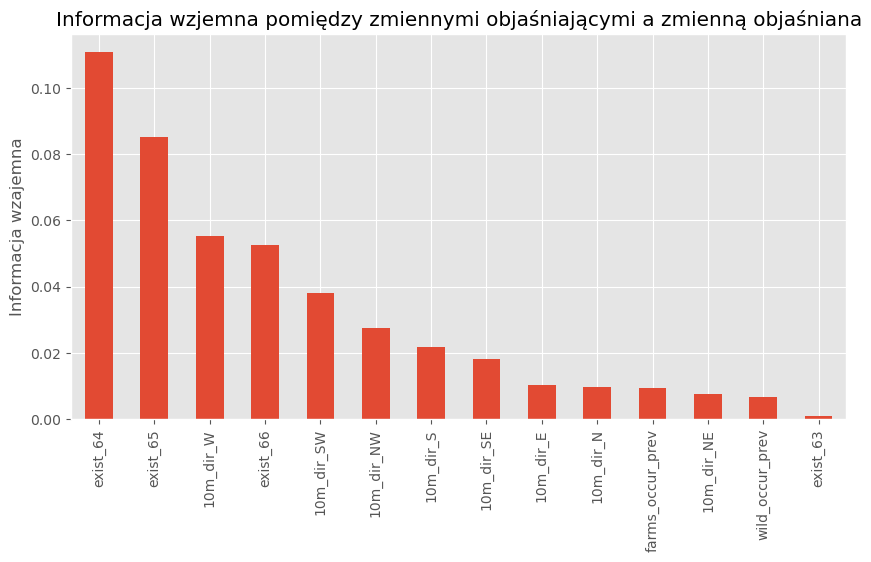

In [24]:
m_i = mutual_info_classif(X_dis, y)
#print(m_i.round(decimals=4))
m_i = pd.Series(m_i)
m_i.index = X_dis.columns
m_i.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Informacja wzajemna')
plt.title("Informacja wzjemna pomiędzy zmiennymi objaśniającymi a zmienną objaśniana")

In [25]:
mutual_info  = mutual_info_classif(X_dis, y)


In [26]:
results = pd.DataFrame.from_dict({'Zmienne' : X_dis.columns, 'Informacja wzjemna': mutual_info}).set_index('Zmienne')
results.sort_values('Informacja wzjemna',ascending=False)

,Informacja wzjemna
Zmienne,
exist_64,0.110213
exist_65,0.084949
10m_dir_W,0.055469
exist_66,0.052321
10m_dir_SW,0.038150
10m_dir_NW,0.027543
10m_dir_S,0.021896
10m_dir_SE,0.018359
10m_dir_E,0.010354


In [27]:
mutual_res = results.sort_values('Informacja wzjemna',ascending=False).round(3)
mutual_res.to_csv("mutual_results.csv")

# Fisher exact test

### Test został przeprowadzony na danych typu boolean

In [28]:
#odrzucam kolumne ktora nie daje mozwliwosic stworzenia 2 wymairowej macierzy


col_names = X_dis.columns
p_value_list = []
odd_list = []

for e in X_dis:  
    table = pd.crosstab(y,X_dis[e]).to_numpy()

    odd_ratio, p_value  = fisher_exact(table)
    p_value_list.append(p_value)
    odd_list.append(odd_ratio)

f_results = pd.DataFrame.from_dict({'Zmienne' : col_names, 'p_value': p_value_list, 'odd_ratio': odd_list}).set_index('Zmienne')
f_results.sort_values('p_value',ascending=True)

,p_value,odd_ratio
Zmienne,,
farms_occur_prev,4.618877e-117,10.091957
exist_64,4.185480e-68,5.415178
exist_65,9.981793e-57,4.261762
exist_66,8.316318e-22,2.519396
wild_occur_prev,3.995516e-12,2.592262
10m_dir_W,3.622935e-05,1.526415
10m_dir_E,3.391241e-03,0.554863
10m_dir_NE,8.865876e-03,0.569917
10m_dir_SW,1.947818e-02,1.299937


In [29]:
table = pd.crosstab(y,X_dis['farms_occur_prev']).to_numpy()
table

array([[2024468,  176957],
       [    263,     232]], dtype=int64)

In [30]:
table = pd.crosstab(y,X_dis['wild_occur_prev']).to_numpy()
table

array([[2053267,  148158],
       [    417,      78]], dtype=int64)

# Regresja logistyczna

### Przypadek zastosowania regresji logistycznej na zbiorze zawierającym wszystkie zmienne ciągłe oraz część kolumn z interkacjami między nimi

In [31]:
#sample_size = 20

poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_con_stand)
df = pd.DataFrame(X_poly)
X_poly.shape

(2201920, 990)

In [32]:
cols = X_con_stand.columns
col_names = cols.to_list()

for i in range(0,44-1):
    for j in range(i+1,44):
        col_name = cols[i] + '*' + cols[j]
        col_names.append(col_name)

### statsmodels.discrete.discrete_model.Logit

In [33]:
coefficients = []
pvalues = []
#number_of_features = 210
y=y.reset_index(drop=True)
for i in range(0,len(col_names)):
    model = sm.Logit(y,df[i]).fit()
    coef = model.params.iloc[0]
    pvalue = model.pvalues.iloc[0]
    coefficients.append(coef)
    pvalues.append(pvalue)


reg_results2 = pd.DataFrame.from_dict({'Zmienne' : col_names, 'pvalue' : pvalues,'coefficients' : coefficients}).set_index('Zmienne')

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
0
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
1
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
3
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
4
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
5
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
6
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
7
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 3
8
Optimization terminated successfully.
         Current function 

C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.662259
         Iterations 11
170
Optimization terminated successfully.
         Current function value: 0.686972
         Iterations 5
171
Optimization terminated successfully.
         Current function value: 0.693143
         Iterations 3
172
Optimization terminated successfully.
         Current function value: 0.693139
         Iterations 4
173
Optimization terminated successfully.
         Current function value: 0.693113
         Iterations 4
174
Optimization terminated successfully.
         Current function value: 0.693137
         Iterations 4
175
Optimization terminated successfully.
         Current function value: 0.693119
         Iterations 4
176
Optimization terminated successfully.
         Current function value: 0.693134
         Iterations 3
177
Optimization terminated successfully.
         Current function value: 0.692875
         Iterations 4
178
Optimization terminated successfully.
       

C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.689069
         Iterations 10
246
Optimization terminated successfully.
         Current function value: 0.693118
         Iterations 4
247
Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3
248
Optimization terminated successfully.
         Current function value: 0.693121
         Iterations 3
249
Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 3
250
Optimization terminated successfully.
         Current function value: 0.693141
         Iterations 3
251
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 3
252
Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 3
253
Optimization terminated successfully.
         Current function value: 0.693105
         Iterations 3
254
Optimization terminated successfully.
       

C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.531407
         Iterations 11
307
Optimization terminated successfully.
         Current function value: 0.691600
         Iterations 7
308
Optimization terminated successfully.
         Current function value: 0.691233
         Iterations 8
309
Optimization terminated successfully.
         Current function value: 0.692776
         Iterations 5
310
Optimization terminated successfully.
         Current function value: 0.682592
         Iterations 6
311
Optimization terminated successfully.
         Current function value: 0.673544
         Iterations 6
312
Optimization terminated successfully.
         Current function value: 0.692684
         Iterations 4
313
Optimization terminated successfully.
         Current function value: 0.681830
         Iterations 6
314
Optimization terminated successfully.
         Current function value: 0.693129
         Iterations 3
315
Optimization terminated successfully.
       

C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 12
360
Optimization terminated successfully.
         Current function value: 0.667624
         Iterations 8
361
Optimization terminated successfully.
         Current function value: 0.692388
         Iterations 5
362
Optimization terminated successfully.
         Current function value: 0.675547
         Iterations 5
363
Optimization terminated successfully.
         Current function value: 0.692846
         Iterations 4
364
Optimization terminated successfully.
         Current function value: 0.687387
         Iterations 6
365
Optimization terminated successfully.
         Current function value: 0.692933
         Iterations 4
366
Optimization terminated successfully.
         Current function value: 0.681663
         Iterations 6
367
Optimization terminated successfully.
         Current function value: 0.676494
         Iterations 6
368
Optimization terminated successfully.
         Cur

C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.677479
         Iterations 14
803


C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.689872
         Iterations 13
804
Optimization terminated successfully.
         Current function value: 0.692023
         Iterations 7
805
Optimization terminated successfully.
         Current function value: 0.690529
         Iterations 5
806
Optimization terminated successfully.
         Current function value: 0.692677
         Iterations 5
807
Optimization terminated successfully.
         Current function value: 0.692830
         Iterations 5
808
Optimization terminated successfully.
         Current function value: 0.691809
         Iterations 6
809
Optimization terminated successfully.
         Current function value: 0.692310
         Iterations 5
810
Optimization terminated successfully.
         Current function value: 0.693120
         Iterations 4
811
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
812
Optimization terminated successfully.
       

C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.682219
         Iterations 16
870
Optimization terminated successfully.
         Current function value: 0.691174
         Iterations 9
871
Optimization terminated successfully.
         Current function value: 0.692640
         Iterations 5
872
Optimization terminated successfully.
         Current function value: 0.692490
         Iterations 6
873
Optimization terminated successfully.
         Current function value: 0.693143
         Iterations 3
874
Optimization terminated successfully.
         Current function value: 0.693064
         Iterations 6
875
Optimization terminated successfully.
         Current function value: 0.693050
         Iterations 5
876
Optimization terminated successfully.
         Current function value: 0.692579
         Iterations 7
877
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
878
Optimization terminated successfully.
       

C:\Users\szym3n\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.674615
         Iterations 10
984
Optimization terminated successfully.
         Current function value: 0.693145
         Iterations 3
985
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
986
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
987
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
988
Optimization terminated successfully.
         Current function value: 0.687009
         Iterations 4
989


In [34]:
reg_results2['coefficients'] = reg_results2['coefficients'].abs()
reg_results2.sort_values('pvalue', ascending=True, inplace=True)
reg_results2[reg_results2['pvalue'] < 0.05].sort_values('coefficients', ascending=False)

,pvalue,coefficients
Zmienne,,
land_class_200*land_class_201,0.000000,65.950163
land_class_150*land_class_200,0.000000,13.546369
count_64*count_65,0.000000,8.207001
land_class_60*land_class_61,0.000000,7.989029
lud*land_class_190,0.000000,7.380622
...,...,...
tp_mean*land_class_202,0.036577,0.003029
land_class_180*distance_to_f_out,0.019674,0.003004
t2m_mean*land_class_70,0.032198,0.002903


## Bez interakcji

In [37]:
col_names = X_con_stand.columns.to_list()
coefficients = []
pvalues = []

#number_of_features = 210
y=y.reset_index(drop=True)
for e in  col_names:
    model = sm.Logit(y,X_con_stand[e]).fit()
    coef = model.params.iloc[0]
    pvalue = model.pvalues.iloc[0]
    coefficients.append(coef)
    pvalues.append(pvalue)


reg_results2 = pd.DataFrame.from_dict({'Zmienne' : col_names, 'pvalue' : pvalues,'coefficients' : coefficients}).set_index('Zmienne')


Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693147
  

In [36]:
reg_results2.sort_values(by='pvalue').round(6)

,pvalue,coefficients
Zmienne,,
count_65,0.178582,0.001813
count_64,0.207580,0.001699
distance_to_latest,0.482918,-0.000946
count_66,0.590538,0.000725
time_to_latest,0.625911,-0.000657
land_class_11,0.671498,0.000572
t2m_mean,0.676512,-0.000562
distance_to_f_out,0.686970,-0.000543
diff_time_f,0.718352,-0.000486
